In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("D:\Certificates&projects\Ai Microsoft & sprint\Heart_Disease_Project\data\heart_disease_cleaned.csv")

X = df.drop(columns=["target", "target_bin"], errors="ignore")
y = df["target_bin"]

print("Shape:", X.shape, y.shape)

Shape: (303, 20) (303,)


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Specialist\AppData\Local\Temp\ipykernel_10664\3092489913.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("D:\Certificates&projects\Ai Microsoft & sprint\Heart_Disease_Project\data\heart_disease_cleaned.csv")


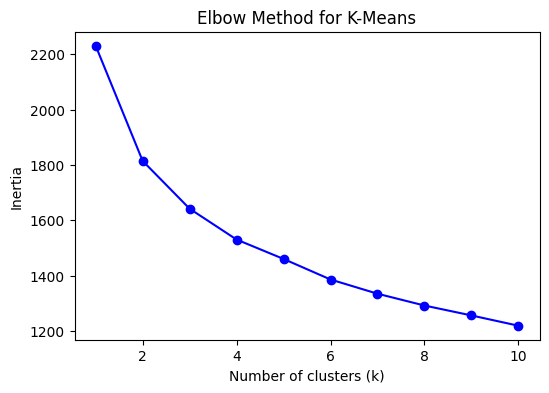

In [ ]:
#  Elbow Method to find best k
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()


In [5]:
#  K-Means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X)

df["kmeans_cluster"] = clusters_kmeans

print("Cluster distribution:")
print(pd.Series(clusters_kmeans).value_counts())


Cluster distribution:
1    162
0    141
Name: count, dtype: int64


In [6]:
#  Compare K-Means clusters vs true labels
cross_tab = pd.crosstab(df["kmeans_cluster"], y, rownames=["Cluster"], colnames=["Actual"])
print("K-Means vs Actual:\n")
print(cross_tab)


K-Means vs Actual:

Actual     0    1
Cluster          
0         41  100
1        123   39


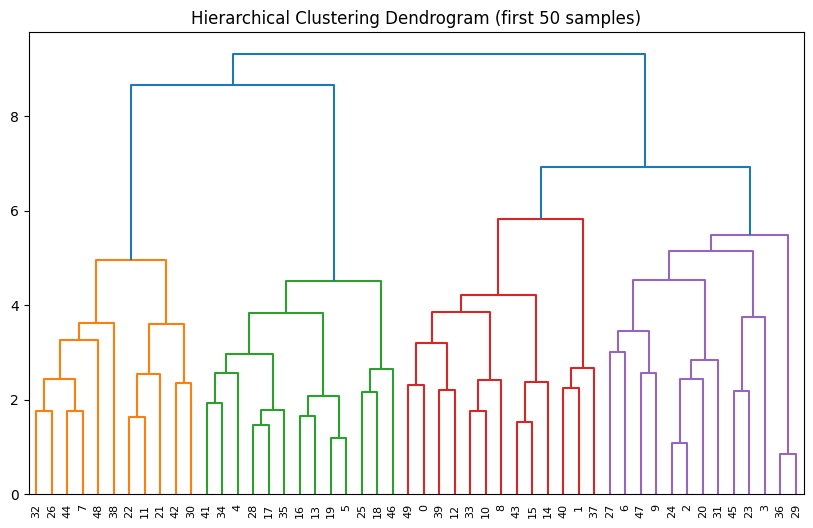

In [7]:
#  Hierarchical clustering dendrogram (first 50 points for clarity)
linked = linkage(X[:50], method="ward")

plt.figure(figsize=(10,6))
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (first 50 samples)")
plt.show()


In [8]:
#  Agglomerative (Hierarchical) clustering with 2 clusters
agg = AgglomerativeClustering(n_clusters=2)
clusters_agg = agg.fit_predict(X)

df["agg_cluster"] = clusters_agg

print("Cluster distribution:")
print(pd.Series(clusters_agg).value_counts())


Cluster distribution:
0    208
1     95
Name: count, dtype: int64


In [9]:
# Cell 7: Compare Hierarchical clusters vs true labels
cross_tab_agg = pd.crosstab(df["agg_cluster"], y, rownames=["Cluster"], colnames=["Actual"])
print("Hierarchical vs Actual:\n")
print(cross_tab_agg)


Hierarchical vs Actual:

Actual     0   1
Cluster         
0        148  60
1         16  79
